In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/content/imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


##  size of the dataset and How many movies are included

In [3]:
df.shape

(1000, 16)

##  features (columns) present in the dataset and does each feature represent

In [4]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Are there any missing values in the dataset? If so, how should they be handled?


In [5]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [29]:
df.dropna(inplace = True)

## What is the distribution of movie ratings? Are they skewed towards positive or negative ratings?

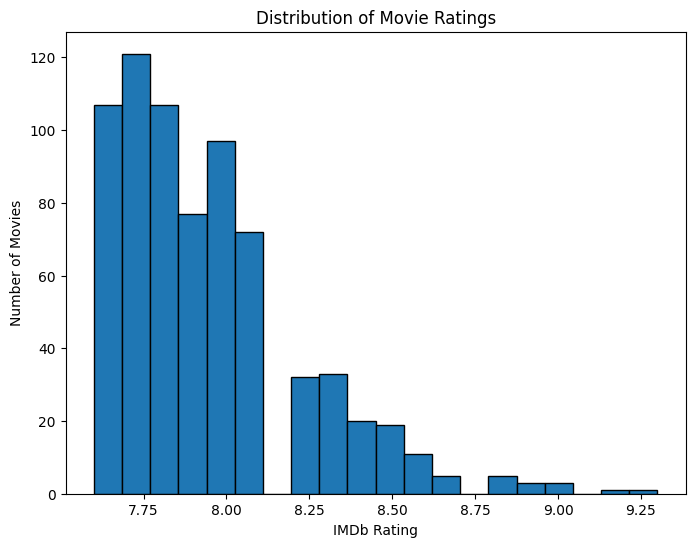

In [10]:
# Plotting the histogram of IMDb ratings
plt.figure(figsize=(8, 6))
plt.hist(df['IMDB_Rating'], bins=20, edgecolor='k')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()
# positive skewed distribution

## Is there a relationship between movie ratings and the number of votes or reviews?

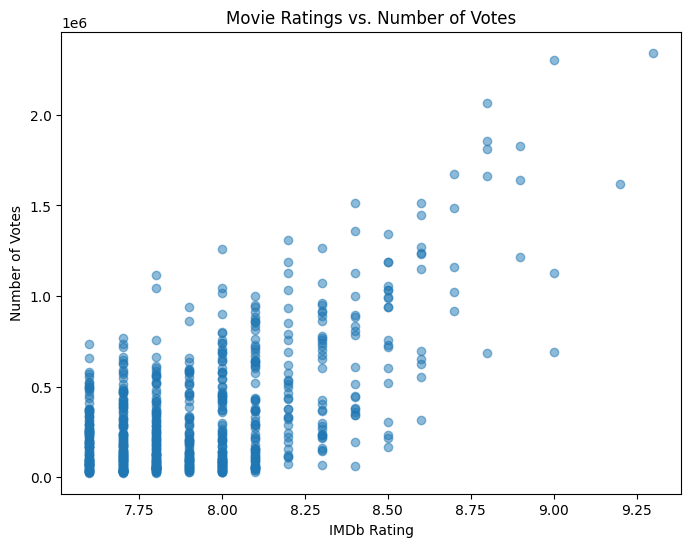

In [11]:
# Create a scatter plot of IMDb ratings against the number of votes
plt.figure(figsize=(8, 6))
plt.scatter(df['IMDB_Rating'], df['No_of_Votes'], alpha=0.5)
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.title('Movie Ratings vs. Number of Votes')
plt.show()

## Are there any outliers in the movie ratings or other numerical features? If so, how should they be treated?


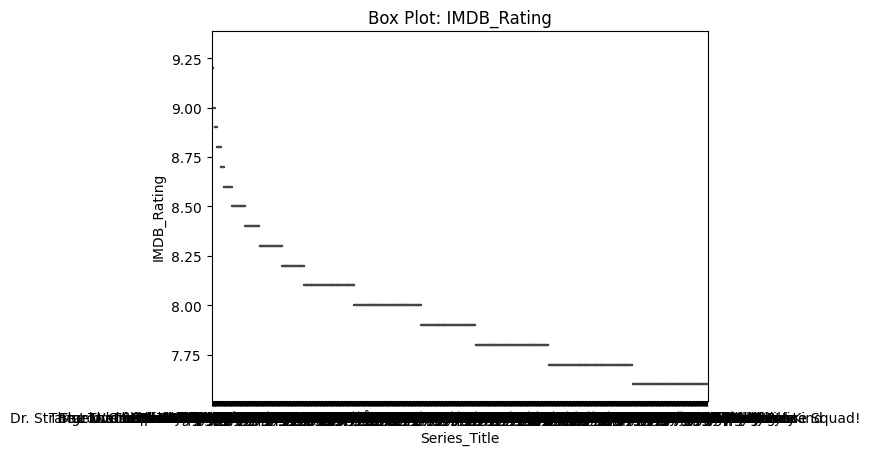

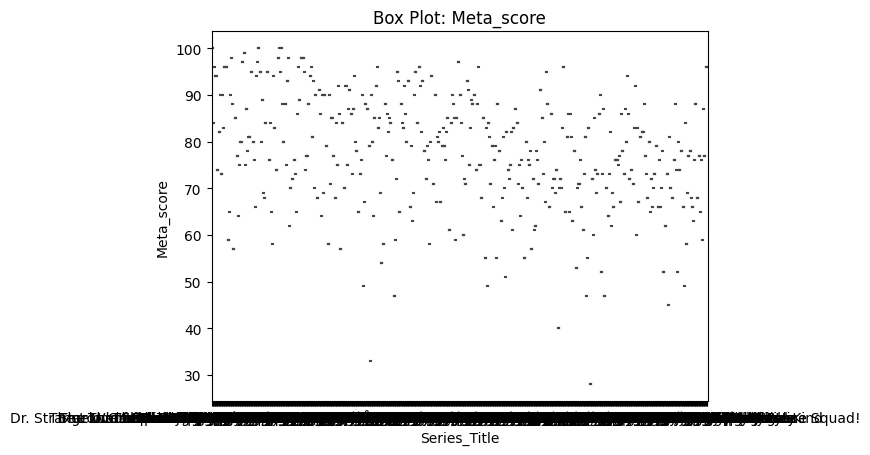

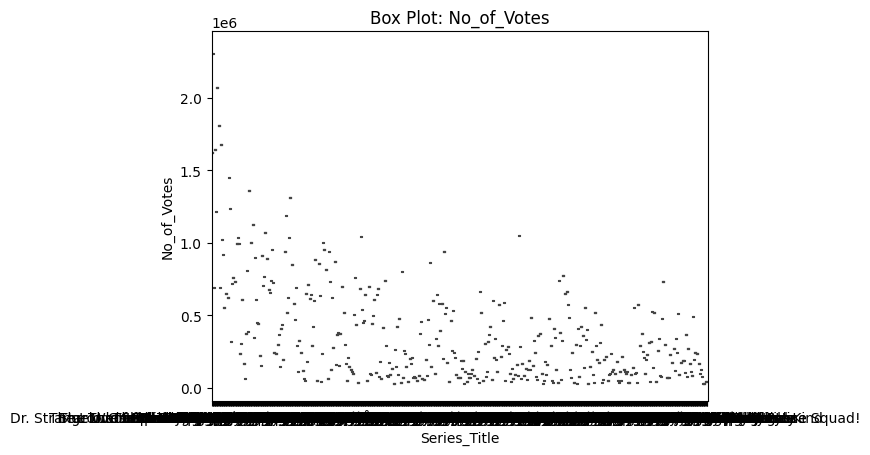

In [12]:
# List to store the non-categorical column names
non_categorical_columns = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is non-categorical (numeric)
    if df[column].dtype != 'object':
        non_categorical_columns.append(column)

# Create the box plots
for column in non_categorical_columns:
    plt.figure()
    sns.boxplot(x='Series_Title', y=column, data=df)
    plt.title(f'Box Plot: {column}')
    plt.show()

## most common genres among the movies in the dataset

In [13]:
# Split the genres string into individual genres and create a list of all genres
all_genres = df['Genre'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Display the top genres with the highest frequencies
print("Most common genres among the movies:")
print(genre_counts.head())

Most common genres among the movies:
Drama        500
Adventure    163
Comedy       161
Crime        142
Action       140
Name: Genre, dtype: int64


## distribution of movie genres affect the ratings?

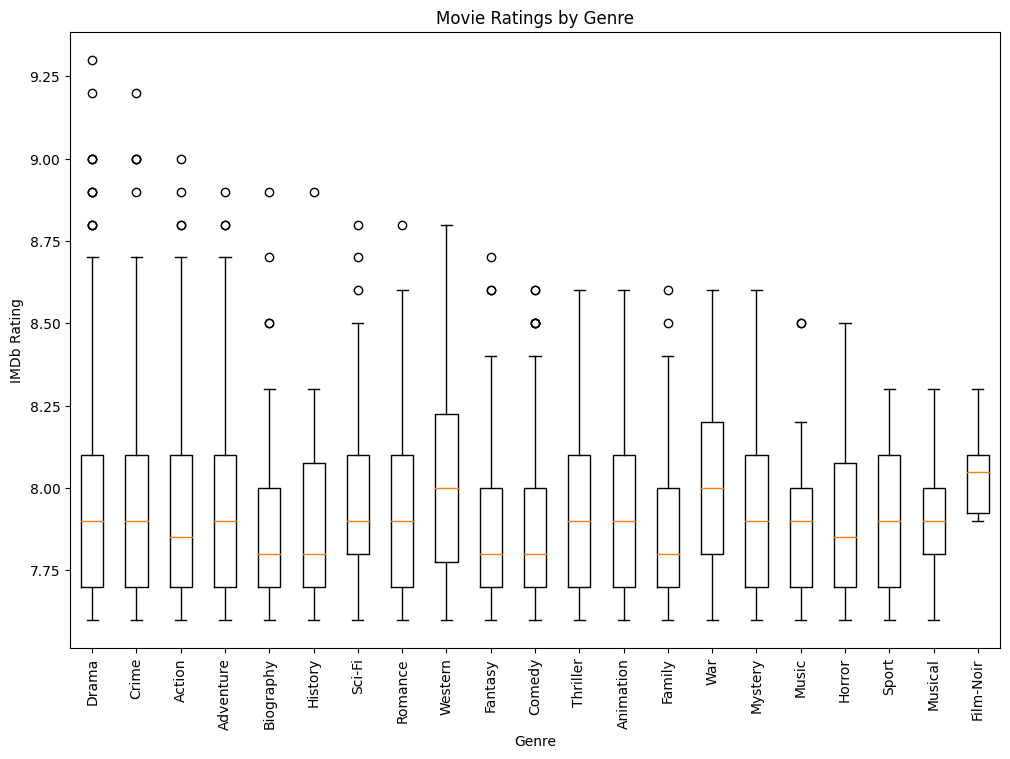

In [14]:
# Split the genres string into individual genres and create a list of all genres
all_genres = df['Genre'].str.split(', ').explode()

# Combine the genres with the corresponding IMDb ratings
genre_ratings = pd.concat([all_genres, df['IMDB_Rating']], axis=1, keys=['Genre', 'IMDB_Rating'])

# Create a box plot for each genre's ratings
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.boxplot([genre_ratings[genre_ratings['Genre'] == genre]['IMDB_Rating'] for genre in genre_ratings['Genre'].unique()], labels=genre_ratings['Genre'].unique())
plt.show()

## correlation between the movie's budget and its rating

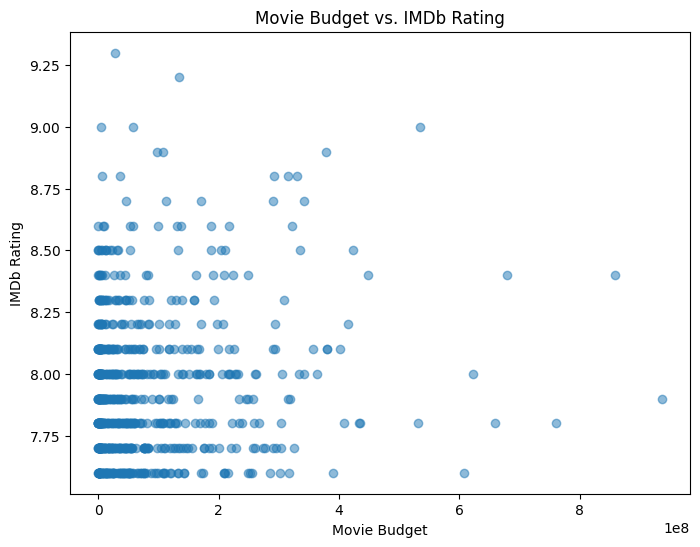

Correlation coefficient between movie budget and IMDb rating: 0.12599157738544153


In [31]:
# Create a scatter plot of movie budget against IMDb ratings
plt.figure(figsize=(8, 6))
plt.scatter(df['Gross'], df['IMDB_Rating'], alpha=0.5)
plt.xlabel('Movie Budget')
plt.ylabel('IMDb Rating')
plt.title('Movie Budget vs. IMDb Rating')
plt.show()

# Calculate the correlation coefficient between budget and IMDb rating
correlation = df['Gross'].corr(df['IMDB_Rating'])
print("Correlation coefficient between movie budget and IMDb rating:", correlation)

In [30]:
# Convert the "Gross" column to integer data type
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)

## What are the top-rated movies in the dataset? What are their common characteristics?


In [34]:
# Sort the DataFrame by IMDb rating in descending order
top_rated_movies = df.sort_values(by='IMDB_Rating', ascending=False)

# Display the top-rated movies and their common characteristics (columns)
print("Top-Rated Movies:")
print(top_rated_movies[['Series_Title', 'IMDB_Rating', 'Genre', 'Released_Year', 'Director', 'Star1', 'Star2']].head())

Top-Rated Movies:
               Series_Title  IMDB_Rating                 Genre Released_Year  \
0  The Shawshank Redemption          9.3                 Drama          1994   
1             The Godfather          9.2          Crime, Drama          1972   
2           The Dark Knight          9.0  Action, Crime, Drama          2008   
3    The Godfather: Part II          9.0          Crime, Drama          1974   
4              12 Angry Men          9.0          Crime, Drama          1957   

               Director           Star1           Star2  
0        Frank Darabont     Tim Robbins  Morgan Freeman  
1  Francis Ford Coppola   Marlon Brando       Al Pacino  
2     Christopher Nolan  Christian Bale    Heath Ledger  
3  Francis Ford Coppola       Al Pacino  Robert De Niro  
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  


## Are there any temporal trends in movie ratings over the years?

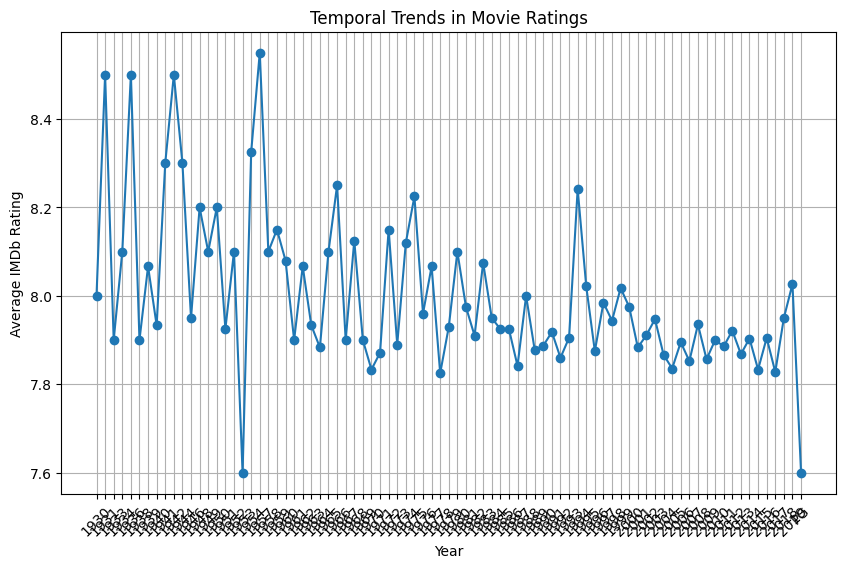

In [35]:
# Group movies by released year and calculate the average IMDb rating for each year
average_ratings_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Create a line plot for temporal trends in movie ratings
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year['Released_Year'], average_ratings_by_year['IMDB_Rating'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('Temporal Trends in Movie Ratings')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## How do the movie ratings vary across different countries or regions?
we have no country column

## Are there any specific directors or actors associated with higher-rated movies?

In [40]:
# Calculate the average IMDb rating for each director
average_ratings_by_director = df.groupby('Director')['IMDB_Rating'].mean().reset_index()

# Calculate the average IMDb rating for each actor
average_ratings_by_actor = pd.concat([df['Star1'], df['Star2']], axis=0).reset_index(drop=True)
average_ratings_by_actor = df.groupby(average_ratings_by_actor)['IMDB_Rating'].mean().reset_index()

# Sort the results in descending order to get the highest-rated directors and actors
top_rated_directors = average_ratings_by_director.sort_values(by='IMDB_Rating', ascending=False)
top_rated_actors = average_ratings_by_actor.sort_values(by='IMDB_Rating', ascending=False)

# Display the top-rated directors and actors
print("Top-Rated Directors:")
print(top_rated_directors.head())

print("\nTop-Rated Actors:")
print(top_rated_actors.head())

Top-Rated Directors:
            Director  IMDB_Rating
103   Frank Darabont         8.95
211   Lana Wachowski         8.70
138   Irvin Kershner         8.70
116     George Lucas         8.60
318  Roberto Benigni         8.60

Top-Rated Actors:
             index  IMDB_Rating
482    Tim Robbins         9.30
270  John Travolta         8.90
311    Liam Neeson         8.90
147    Elijah Wood         8.80
205    Henry Fonda         8.75


## Can we identify any patterns based on movie duration and ratings?

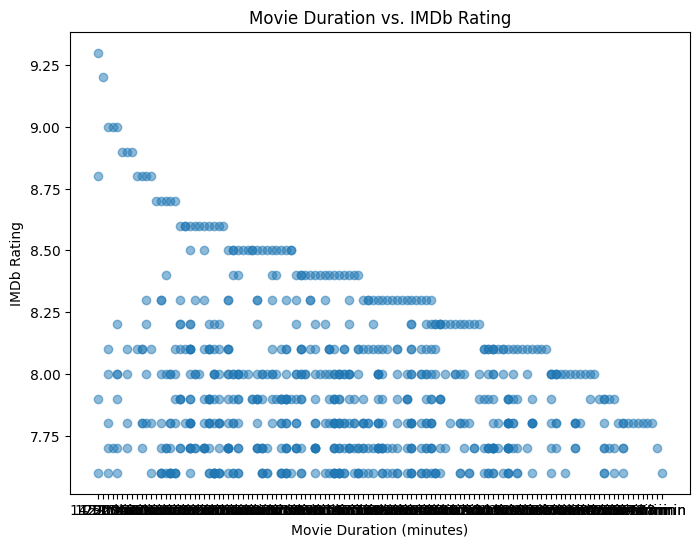

In [41]:
# Create a scatter plot of movie duration against IMDb ratings
plt.figure(figsize=(8, 6))
plt.scatter(df['Runtime'], df['IMDB_Rating'], alpha=0.5)
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.title('Movie Duration vs. IMDb Rating')
plt.show()

## How do the movie ratings differ across various film certification categories (e.g., G, PG, PG-13, R)?

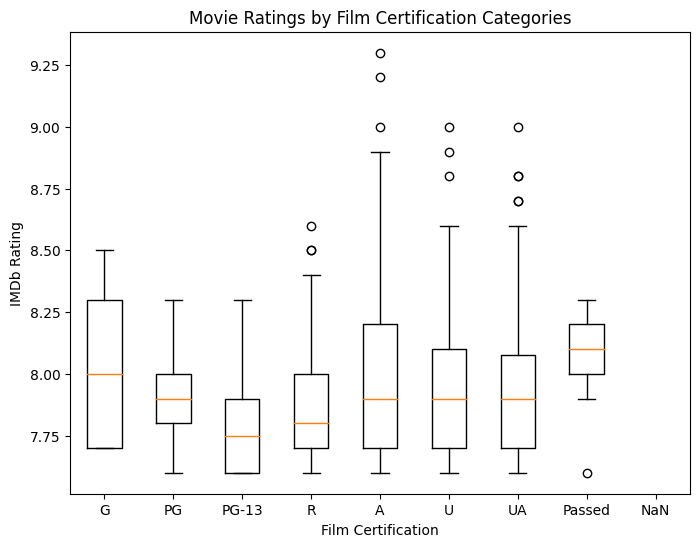

In [42]:
# Create a box plot for movie ratings by film certification categories
plt.figure(figsize=(8, 6))
certification_categories = ['G', 'PG', 'PG-13', 'R', 'A', 'U', 'UA', 'Passed', 'NaN']
plt.boxplot([df[df['Certificate'] == category]['IMDB_Rating'] for category in certification_categories], labels=certification_categories)
plt.xlabel('Film Certification')
plt.ylabel('IMDb Rating')
plt.title('Movie Ratings by Film Certification Categories')
plt.show()

## Are there any interesting insights when comparing the ratings of different movie types, such as animated vs. live-action or sci-fi vs. drama?

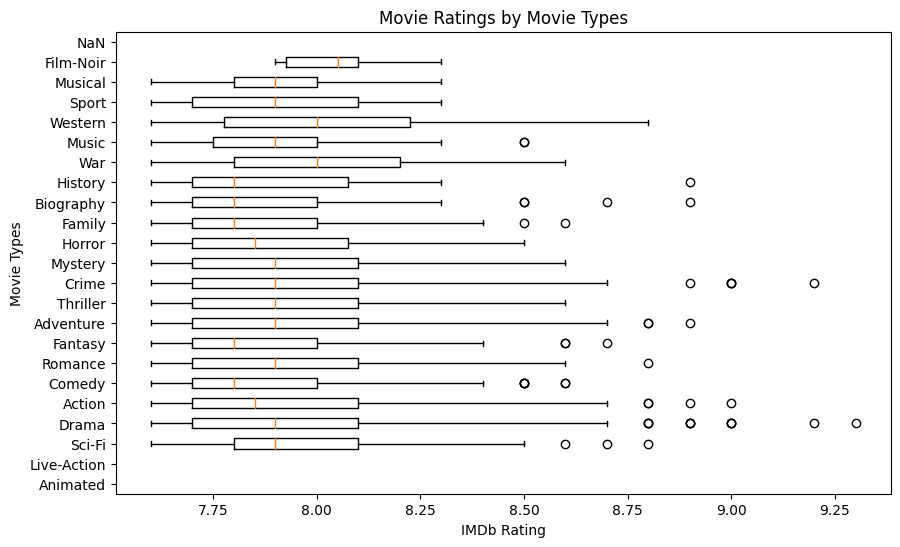

In [43]:
# Create a box plot for movie ratings by movie types (e.g., animated vs. live-action)
plt.figure(figsize=(10, 6))
movie_types = ['Animated', 'Live-Action', 'Sci-Fi', 'Drama', 'Action', 'Comedy', 'Romance', 'Fantasy', 'Adventure', 'Thriller', 'Crime', 'Mystery', 'Horror', 'Family', 'Biography', 'History', 'War', 'Music', 'Western', 'Sport', 'Musical', 'Film-Noir', 'NaN']
plt.boxplot([df[df['Genre'].str.contains(t)]['IMDB_Rating'].dropna() for t in movie_types], labels=movie_types, vert=False)
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Types')
plt.title('Movie Ratings by Movie Types')
plt.show()

## Is there a relationship between the movie runtime and its rating?


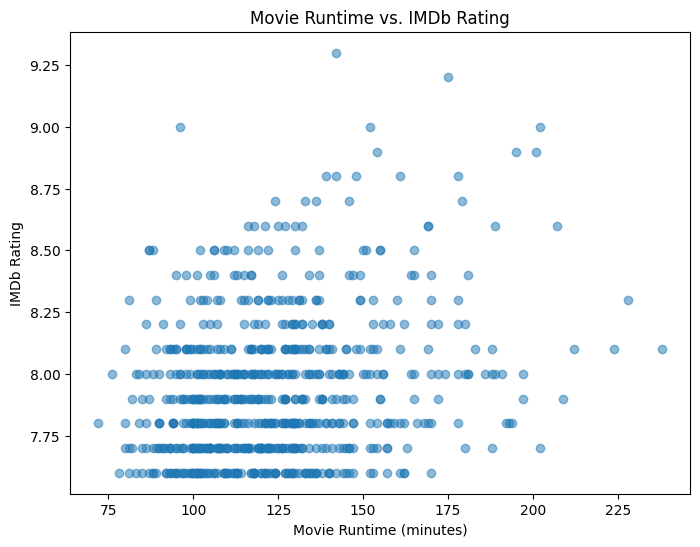

Correlation coefficient between movie runtime and IMDb rating: 0.25822381247916015


In [48]:
# Create a scatter plot of movie runtime against IMDb ratings
plt.figure(figsize=(8, 6))
plt.scatter(df['Runtime'], df['IMDB_Rating'], alpha=0.5)
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.title('Movie Runtime vs. IMDb Rating')
plt.show()

# Calculate the correlation coefficient between movie runtime and IMDb rating
correlation = df['Runtime'].corr(df['IMDB_Rating'])
print("Correlation coefficient between movie runtime and IMDb rating:", correlation)

In [47]:
# Convert the "Gross" column to integer data type
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)

## Are certain production studios associated with higher-rated movies?
we have no production column or feature

## How do movie budgets vary with respect to genres and ratings?

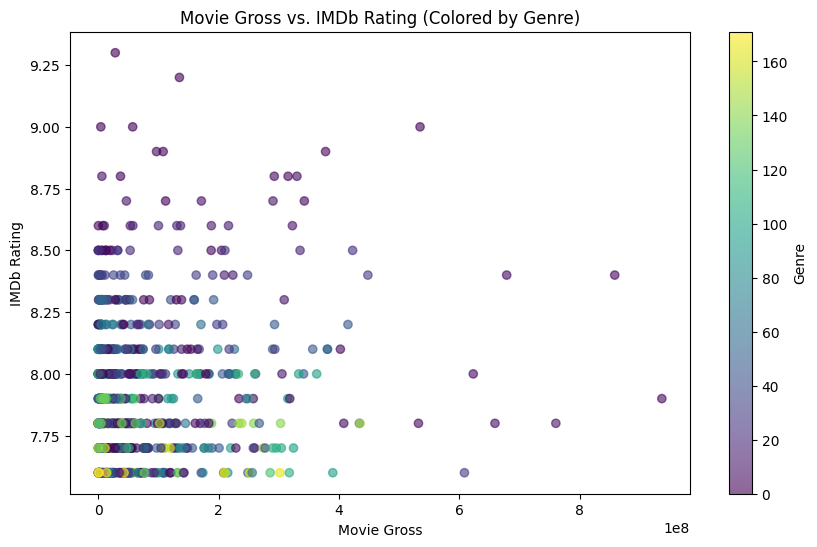

In [51]:
# Create a scatter plot of movie budgets against IMDb ratings, colored by genre
plt.figure(figsize=(10, 6))
plt.scatter(df['Gross'], df['IMDB_Rating'], c=pd.factorize(df['Genre'])[0], cmap='viridis', alpha=0.6)
plt.colorbar(label='Genre')
plt.xlabel('Movie Gross')
plt.ylabel('IMDb Rating')
plt.title('Movie Gross vs. IMDb Rating (Colored by Genre)')
plt.show()

## Can we identify any seasonal trends or patterns in movie ratings?

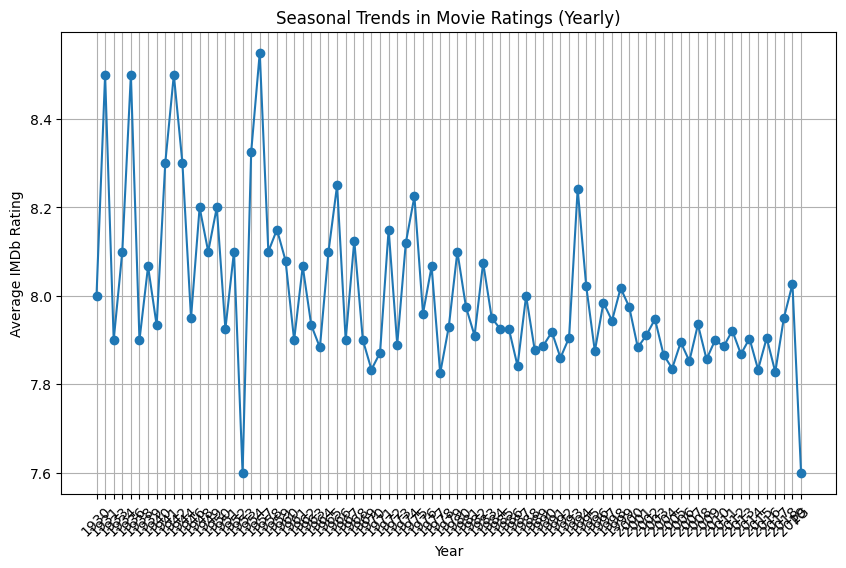

In [55]:
# Create a line plot for average IMDb ratings over different years
average_ratings_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year['Released_Year'], average_ratings_by_year['IMDB_Rating'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('Seasonal Trends in Movie Ratings (Yearly)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()